# Clustering

A clustering algorithm looks at a number of data points and automatically finds data points that are related or similar to each other.

K-Means is a popular clustering algorithm and it tries to optimize a cost function called distortion function

PCA is a dimensional reduction technique used here for visualization and to gain self intuition for this data

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import sklearn
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/Extracted-data/Saccades/Saccades-1.csv')
df

,LeftPupilPoints,RightPupilPoints,LeftPupilPoints-X,LeftPupilPoints-Y,RightPupilPoints-X,RightPupilPoints-Y
0,"4.13,0.84","7.32,1.81",4.13,0.84,7.32,1.81
1,"3.99,1.19","7.46,2.28",3.99,1.19,7.46,2.28
2,"4.18,1.94","7.30,2.81",4.18,1.94,7.30,2.81
3,"4.01,2.85","7.30,3.16",4.01,2.85,7.30,3.16
4,"4.07,3.84","7.48,2.98",4.07,3.84,7.48,2.98
...,...,...,...,...,...,...
406,"-25.22,-12.60","-28.66,-15.07",-25.22,-12.60,-28.66,-15.07
407,"-25.07,-11.95","-28.60,-15.07",-25.07,-11.95,-28.60,-15.07
408,"-25.17,-11.95","-28.65,-15.09",-25.17,-11.95,-28.65,-15.09
409,"-25.26,-12.37","-28.63,-15.21",-25.26,-12.37,-28.63,-15.21


In [3]:
df.drop(columns = ['LeftPupilPoints', 'RightPupilPoints'], inplace =True)
# df.drop(columns = ['clusters'], inplace = True)
df


,LeftPupilPoints-X,LeftPupilPoints-Y,RightPupilPoints-X,RightPupilPoints-Y
0,4.13,0.84,7.32,1.81
1,3.99,1.19,7.46,2.28
2,4.18,1.94,7.30,2.81
3,4.01,2.85,7.30,3.16
4,4.07,3.84,7.48,2.98
...,...,...,...,...
406,-25.22,-12.60,-28.66,-15.07
407,-25.07,-11.95,-28.60,-15.07
408,-25.17,-11.95,-28.65,-15.09
409,-25.26,-12.37,-28.63,-15.21


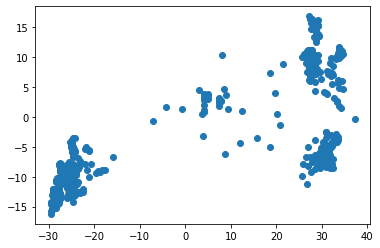

In [4]:
plt.scatter([df['LeftPupilPoints-X'],df['RightPupilPoints-X']],[df['LeftPupilPoints-Y'],df['RightPupilPoints-Y']])

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,4.787988,3.622072
1,4.909669,3.796341
2,5.127179,3.459938
3,5.247031,3.422808
4,5.626803,3.267394
...,...,...
406,-44.498747,0.016906
407,-44.210232,-0.186082
408,-44.313028,-0.154065
409,-44.461356,-0.002460


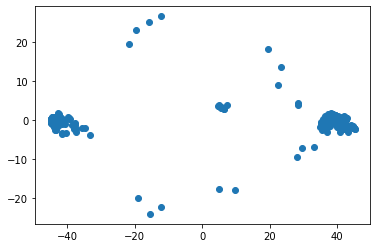

In [6]:
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])

In [7]:
km = KMeans(n_clusters = 3, n_init = 1000)
km

KMeans(n_clusters=3, n_init=1000)

In [8]:
y_preds = km.fit_predict(df)

In [9]:
df['clusters'] = y_preds
df

,LeftPupilPoints-X,LeftPupilPoints-Y,RightPupilPoints-X,RightPupilPoints-Y,clusters
0,4.13,0.84,7.32,1.81,2
1,3.99,1.19,7.46,2.28,2
2,4.18,1.94,7.30,2.81,2
3,4.01,2.85,7.30,3.16,2
4,4.07,3.84,7.48,2.98,2
...,...,...,...,...,...
406,-25.22,-12.60,-28.66,-15.07,1
407,-25.07,-11.95,-28.60,-15.07,1
408,-25.17,-11.95,-28.65,-15.09,1
409,-25.26,-12.37,-28.63,-15.21,1


Text(0, 0.5, 'Y-axis')

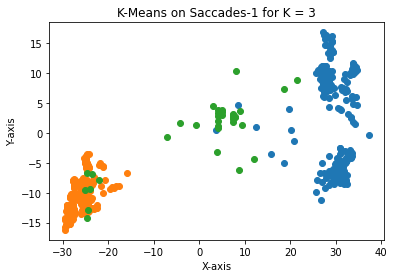

In [10]:
df0 = df[df.clusters == 0]
df1 = df[df.clusters == 1]
df2 = df[df.clusters == 2]
# df3 = df[df.clusters == 3]
# df4 = df[df.clusters == 4]

plt.scatter([df0['LeftPupilPoints-X'],df0['RightPupilPoints-X']],[df0['LeftPupilPoints-Y'],df0['RightPupilPoints-Y']])
plt.scatter([df1['LeftPupilPoints-X'],df1['RightPupilPoints-X']],[df1['LeftPupilPoints-Y'],df1['RightPupilPoints-Y']])
plt.scatter([df2['LeftPupilPoints-X'],df2['RightPupilPoints-X']],[df2['LeftPupilPoints-Y'],df2['RightPupilPoints-Y']])
# plt.scatter([df0['LeftPupilPoints-X'],df0['RightPupilPoints-X']],[df0['LeftPupilPoints-Y'],df0['RightPupilPoints-Y']])
# plt.scatter([df0['LeftPupilPoints-X'],df0['RightPupilPoints-X']],[df0['LeftPupilPoints-Y'],df0['RightPupilPoints-Y']])

plt.title('K-Means on Saccades-1 for K = 3')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

In [11]:
km2 = KMeans(n_clusters = 3, n_init = 1000)
km2

KMeans(n_clusters=3, n_init=1000)

In [12]:
y_preds2 = km.fit_predict(principalDf)

In [13]:
principalDf['clusters'] = y_preds
principalDf

,principal component 1,principal component 2,clusters
0,4.787988,3.622072,2
1,4.909669,3.796341,2
2,5.127179,3.459938,2
3,5.247031,3.422808,2
4,5.626803,3.267394,2
...,...,...,...
406,-44.498747,0.016906,1
407,-44.210232,-0.186082,1
408,-44.313028,-0.154065,1
409,-44.461356,-0.002460,1


Text(0, 0.5, 'Y-axis')

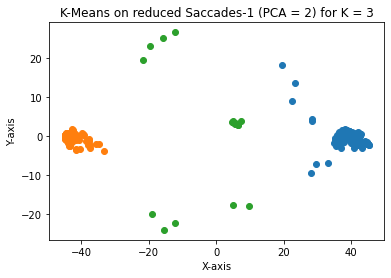

In [14]:
df0 = principalDf[principalDf.clusters == 0]
df1 = principalDf[principalDf.clusters == 1]
df2 = principalDf[principalDf.clusters == 2]
# df3 = principalDf[principalDf.clusters == 3]
# df4 = principalDf[principalDf.clusters == 4]

plt.scatter(df0['principal component 1'],df0['principal component 2'])
plt.scatter(df1['principal component 1'],df1['principal component 2'])
plt.scatter(df2['principal component 1'],df2['principal component 2'])
# plt.scatter(df3['principal component 1'],df3['principal component 2'])
# plt.scatter(df4['principal component 1'],df4['principal component 2'])

plt.title('K-Means on reduced Saccades-1 (PCA = 2) for K = 3')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')